In [190]:
import numpy as np
import random 
import os

In [191]:
import torch
from torch.autograd import Variable 

## Define the variable

In [196]:
x_data = np.linspace(-1.0, 1.0, 201)
x_data = x_data.reshape((201, 1))
# np.array([[float(i)] for i in range(100)])
# (torch.Tensor([ [float(i)] for i in range(100) ]))
# print(x_data)
# Variable(torch.Tensor([[1.0], [2.0], [3.0]]))
# y_data = 
# Variable(torch.Tensor([[2.0], [4.0], [6.0]]))
# print(x_data.shape)

In [197]:
# 
y_data = (x_data)**2.0 + np.random.normal(0, 0.1, x_data.shape)
# 
# x_data.astype(np.float32)
print(y_data.shape)

(201, 1)


In [185]:
# x_data.tolist()
# y_data.tolist()

[[1.2384929598786774],
 [0.9694638122199132],
 [1.0273036142089886],
 [0.8693737988747736],
 [1.0963693477608263],
 [0.840077230919115],
 [0.885126784086597],
 [0.9263391331918683],
 [1.0497195974713893],
 [0.8328916241814244],
 [0.6901560943087321],
 [0.6364311877503183],
 [0.7758157236075678],
 [0.7431582319664388],
 [0.7232859602861283],
 [0.6816625143565977],
 [0.5810628102293525],
 [0.8069254492268501],
 [0.49831143114209],
 [0.7175214490727526],
 [0.6610653694009959],
 [0.5124683587945591],
 [0.5860349046731387],
 [0.5552416711124484],
 [0.4921545566297749],
 [0.7691104654130295],
 [0.48328661229984227],
 [0.5730894729274204],
 [0.4269940707329192],
 [0.5821050225237927],
 [0.4854464332474854],
 [0.5933344394717528],
 [0.2646631493089304],
 [0.5042763336782603],
 [0.2389738440041309],
 [0.6292670410430572],
 [0.3715248615211462],
 [0.5042183699185204],
 [0.3870966036765612],
 [0.20769757316219417],
 [0.3990890366639008],
 [0.22833525204538216],
 [0.4527472653785797],
 [0.33736677

In [186]:
x_data = Variable(torch.tensor(x_data.tolist()))
# Variable(torch.tensor(x_data.tolist()))
# Variable(torch.from_numpy(x_data))
y_data = Variable(torch.tensor(y_data.tolist()))
# Variable(torch.tensor(y_data.tolist()))
# Variable(torch.from_numpy(y_data))

# https://medium.com/@benjamin.phillips22/simple-regression-with-neural-networks-in-pytorch-313f06910379

## Define the model

In [135]:
# Initializing our model
# Declaring a forward pass
class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1) # one in and one out
        # LASS torch.nn.Linear(in_features, out_features, bias=True)
    
    def forward(self, x):
        y_pred = self.linear(x)
        return(y_pred)

In [187]:
class NonLinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super(NonLinearRegressionModel, self).__init__()
        self.layers = torch.nn.Sequential(
      torch.nn.Linear(1, 20),
      torch.nn.ReLU(),
     torch.nn.Linear(20, 20),
      torch.nn.ReLU(),
      torch.nn.Linear(20, 1)
    )
        
    def forward(self, x):
        y_pred = self.layers(x)
        return(y_pred)

In [137]:
# 
my_model = LinearRegressionModel()
criterion = torch.nn.MSELoss(size_average = False) # define the criterion
optimizer = torch.optim.SGD(my_model.parameters(), lr = 0.01) # optimizer

In [138]:
# perform a forward pass by passing our data and finding out the predicted value of y
# compute the loss using MSE
# reset all the gradients to 0, perform a backpropagation and then, update the weights
for epoch in range(500):
    # forward pass, compute predicted y by passing x to the model
    pred_y = my_model(x_data)
    # compute and print loss
    loss = criterion(pred_y, y_data)
    # Zero gradients, perform a backward pass, and update the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print("epoch {}, loss {}".format(epoch, loss.item()))

epoch 0, loss 25938.04296875
epoch 1, loss 1583774.25
epoch 2, loss 1567957632.0
epoch 3, loss 1689301286912.0
epoch 4, loss 1821288398061568.0
epoch 5, loss 1.9635991243474862e+18
epoch 6, loss 2.1170287504112558e+21
epoch 7, loss 2.2824470613510834e+24
epoch 8, loss 2.4607918225100869e+27
epoch 9, loss 2.653071127025857e+30
epoch 10, loss 2.860374660737495e+33
epoch 11, loss 3.083875730054625e+36
epoch 12, loss inf
epoch 13, loss inf
epoch 14, loss inf
epoch 15, loss inf
epoch 16, loss inf
epoch 17, loss inf
epoch 18, loss inf
epoch 19, loss inf
epoch 20, loss inf
epoch 21, loss inf
epoch 22, loss inf
epoch 23, loss inf
epoch 24, loss inf
epoch 25, loss nan
epoch 26, loss nan
epoch 27, loss nan
epoch 28, loss nan
epoch 29, loss nan
epoch 30, loss nan
epoch 31, loss nan
epoch 32, loss nan
epoch 33, loss nan
epoch 34, loss nan
epoch 35, loss nan
epoch 36, loss nan
epoch 37, loss nan
epoch 38, loss nan
epoch 39, loss nan
epoch 40, loss nan
epoch 41, loss nan
epoch 42, loss nan
epoch 43,

In [13]:
new_var = Variable(torch.Tensor([[4.0]]))
pred_y = my_model(new_var)

In [188]:
# 
my_model2 = NonLinearRegressionModel()
criterion = torch.nn.MSELoss(size_average = False)
optimizer = torch.optim.SGD(my_model2.parameters(), lr = 0.01)

In [189]:
for epoch in range(500):
    # forward pass, compute predicted y by passing x to the model
    pred_y = my_model2(x_data)
    # compute and print loss
    loss = criterion(pred_y, y_data)
    # Zero gradients, perform a backward pass, and update the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print("epoch {}, loss {}".format(epoch, loss.item()))

epoch 0, loss 35.99683380126953
epoch 1, loss 1541.47900390625
epoch 2, loss 22029.888671875
epoch 3, loss 423990.84375
epoch 4, loss 3873467.25
epoch 5, loss 8.563342489865865e+23
epoch 6, loss 1.3565340139729924e+25
epoch 7, loss 1.2372133482493406e+26
epoch 8, loss 1.128387261201837e+27
epoch 9, loss 1.0291336397547367e+28
epoch 10, loss 9.386101007961277e+28
epoch 11, loss 8.560508754121768e+29
epoch 12, loss 7.807525831713065e+30
epoch 13, loss 7.120773275645894e+31
epoch 14, loss 6.494432290209915e+32
epoch 15, loss 5.92318718021925e+33
epoch 16, loss 5.40218315490746e+34
epoch 17, loss 4.927004525482314e+35
epoch 18, loss 4.493621089014237e+36
epoch 19, loss 4.098361547140194e+37
epoch 20, loss inf
epoch 21, loss inf
epoch 22, loss inf
epoch 23, loss inf
epoch 24, loss inf
epoch 25, loss inf
epoch 26, loss inf
epoch 27, loss inf
epoch 28, loss inf
epoch 29, loss inf
epoch 30, loss inf
epoch 31, loss inf
epoch 32, loss inf
epoch 33, loss inf
epoch 34, loss inf
epoch 35, loss inf


In [167]:
for name, param in my_model2.named_parameters():
    print(param)

Parameter containing:
tensor([[-2.0157],
        [29.1117],
        [-0.7374],
        [ 0.4546],
        [-0.1432],
        [-0.4898],
        [ 8.8338],
        [11.2740],
        [24.4619],
        [ 5.9873]], requires_grad=True)
Parameter containing:
tensor([ -5.4511, -44.5840,  -2.8989,  -0.9109,  -0.4589,  -0.5570, -82.7274,
        -32.6329, -82.6713, -51.7798], requires_grad=True)
Parameter containing:
tensor([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]],
       requires_grad=True)
Parameter containing:
tensor([nan], requires_grad=True)


In [143]:
# 
new_x_data = np.linspace(-5.0, 5.0, 201)
new_x_data = new_x_data.reshape((201, 1))
new_x_data = Variable(torch.tensor(new_x_data.tolist()))
pred_y = my_model2(new_x_data)

In [146]:
pred_y - y_data

tensor([[-2.6585e+01],
        [-2.7008e+01],
        [-2.5719e+01],
        [-2.4081e+01],
        [-2.3098e+01],
        [-2.4500e+01],
        [-2.4277e+01],
        [-2.3643e+01],
        [-2.2939e+01],
        [-2.4253e+01],
        [-2.0647e+01],
        [-2.1907e+01],
        [-2.2474e+01],
        [-2.1158e+01],
        [-2.1126e+01],
        [-1.8563e+01],
        [-2.1548e+01],
        [-1.9811e+01],
        [-1.7305e+01],
        [-1.8749e+01],
        [-1.5682e+01],
        [-1.6105e+01],
        [-1.5797e+01],
        [-1.5839e+01],
        [-1.7496e+01],
        [-1.6179e+01],
        [-1.4219e+01],
        [-1.5050e+01],
        [-1.3818e+01],
        [-1.2209e+01],
        [-1.2437e+01],
        [-1.3159e+01],
        [-1.1942e+01],
        [-1.5215e+01],
        [-1.3515e+01],
        [-1.2688e+01],
        [-1.1060e+01],
        [-1.0818e+01],
        [-9.5645e+00],
        [-7.9812e+00],
        [-1.0343e+01],
        [-8.9485e+00],
        [-1.0013e+01],
        [-1

## Regression with Neural Networks in PyTorch

In [ ]:
# https://medium.com/@benjamin.phillips22/simple-regression-with-neural-networks-in-pytorch-313f06910379

In [213]:
# from torch.autograd import Variable
# import torch.nn.functional as F
# import torch.utils.data as Data
import imageio
# import numpy as np
import matplotlib.pyplot as plt

In [201]:
torch.manual_seed(1)

In [217]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim = 1)
y = x.pow(2) + 0.2*torch.rand(x.size())

In [218]:
x, y = Variable(x), Variable(y)

In [210]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden) # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output) # output layer
    
    def forward(self, x):
        x = torch.nn.functional.relu(self.hidden(x))
        x = self.predict(x)
        return(x)

In [224]:
myNet = Net(1, 20, 1)
criterion = torch.nn.MSELoss(size_average = True)
optimizer = torch.optim.SGD(myNet.parameters(), lr = 0.1)

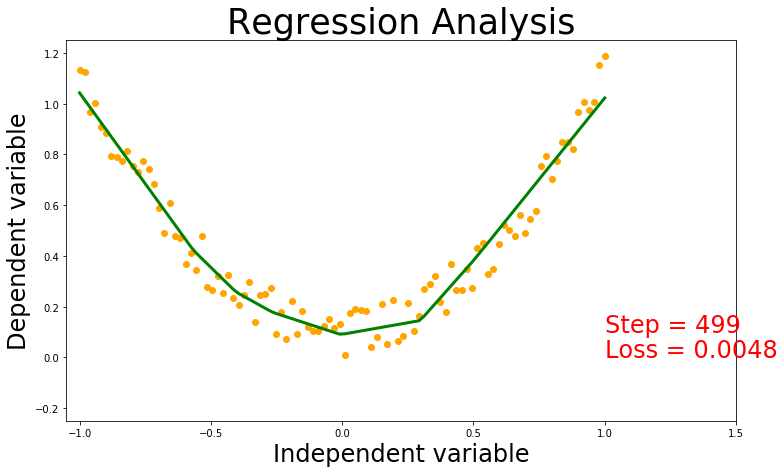

In [225]:
my_images = []
fig, ax = plt.subplots(figsize=(12,7))
# 
for epoch in range(500):
    # forward pass, compute predicted y by passing x to the model
    pred_y = myNet(x)
    # compute and print loss
    loss = criterion(pred_y, y)
    # Zero gradients, perform a backward pass, and update the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # plot and show learning process
    plt.cla()
    ax.set_title('Regression Analysis', fontsize=35)
    ax.set_xlabel('Independent variable', fontsize=24)
    ax.set_ylabel('Dependent variable', fontsize=24)
    ax.set_xlim(-1.05, 1.5)
    ax.set_ylim(-0.25, 1.25)
    ax.scatter(x.data.numpy(), y.data.numpy(), color = "orange")
    ax.plot(x.data.numpy(), pred_y.data.numpy(), 'g-', lw=3)
    ax.text(1.0, 0.1, 'Step = %d' % epoch, fontdict={'size': 24, 'color':  'red'})
    ax.text(1.0, 0, 'Loss = %.4f' % loss.data.numpy(),
            fontdict={'size': 24, 'color':  'red'})

    # Used to return the plot as an image array 
    # (https://ndres.me/post/matplotlib-animated-gifs-easily/)
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    my_images.append(image)

In [221]:
# save images as a gif    
imageio.mimsave('./curve_1.gif', my_images, fps=10)

In [234]:
# another way to define a network
# another way to define a network
net = torch.nn.Sequential(
        torch.nn.Linear(1, 200),
        torch.nn.ReLU(),
        torch.nn.Linear(200, 100),
        torch.nn.ReLU(),
        torch.nn.Linear(100, 1),
    )

In [235]:
x = torch.unsqueeze(torch.linspace(-10, 10, 1000), dim=1)  # x data (tensor), shape=(100, 1)
y = torch.sin(x) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)
# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)

In [236]:
optimizer = torch.optim.SGD(net.parameters(), lr = 0.01)
criterion = torch.nn.MSELoss(size_average = True)

In [237]:
for epoch in range(1000):
    # make predictions
    y_pred = net(x)
    # calculate the loss
    loss = criterion(y_pred, y)
    #
    optimizer.zero_grad() # clear gradients for next train
    loss.backward() # backpropagation, compute gradients
    optimizer.step() # apply gradients
    #
    print("epoch {}, loss {}".format(epoch, loss.item()))

epoch 0, loss 0.7364994883537292
epoch 1, loss 2.1638920307159424
epoch 2, loss 8.385820388793945
epoch 3, loss 3.358438491821289
epoch 4, loss 0.5094099044799805
epoch 5, loss 0.47470149397850037
epoch 6, loss 0.4639514088630676
epoch 7, loss 0.45991089940071106
epoch 8, loss 0.45790812373161316
epoch 9, loss 0.45625218749046326
epoch 10, loss 0.45505794882774353
epoch 11, loss 0.4540567696094513
epoch 12, loss 0.4530787467956543
epoch 13, loss 0.45215412974357605
epoch 14, loss 0.4513077437877655
epoch 15, loss 0.4507083296775818
epoch 16, loss 0.4501292407512665
epoch 17, loss 0.4496064782142639
epoch 18, loss 0.449057400226593
epoch 19, loss 0.44854891300201416
epoch 20, loss 0.44803091883659363
epoch 21, loss 0.4475487470626831
epoch 22, loss 0.4470657706260681
epoch 23, loss 0.446540504693985
epoch 24, loss 0.4460963010787964
epoch 25, loss 0.4460046887397766
epoch 26, loss 0.44549819827079773
epoch 27, loss 0.4449622929096222
epoch 28, loss 0.4446990191936493
epoch 29, loss 0.44

epoch 240, loss 0.37166091799736023
epoch 241, loss 0.3713373839855194
epoch 242, loss 0.37101492285728455
epoch 243, loss 0.37069305777549744
epoch 244, loss 0.37037262320518494
epoch 245, loss 0.37005290389060974
epoch 246, loss 0.3697340488433838
epoch 247, loss 0.36941635608673096
epoch 248, loss 0.369099497795105
epoch 249, loss 0.36878353357315063
epoch 250, loss 0.36846837401390076
epoch 251, loss 0.36815381050109863
epoch 252, loss 0.3678399324417114
epoch 253, loss 0.3675265610218048
epoch 254, loss 0.3672145903110504
epoch 255, loss 0.3669033646583557
epoch 256, loss 0.3665933310985565
epoch 257, loss 0.36628440022468567
epoch 258, loss 0.3659762442111969
epoch 259, loss 0.36566925048828125
epoch 260, loss 0.3653632700443268
epoch 261, loss 0.36505821347236633
epoch 262, loss 0.3647540509700775
epoch 263, loss 0.36445051431655884
epoch 264, loss 0.3641476035118103
epoch 265, loss 0.3638456165790558
epoch 266, loss 0.36354461312294006
epoch 267, loss 0.3632450997829437
epoch 2

epoch 477, loss 0.3184264600276947
epoch 478, loss 0.31819581985473633
epoch 479, loss 0.31808969378471375
epoch 480, loss 0.3178364932537079
epoch 481, loss 0.31772464513778687
epoch 482, loss 0.3174954056739807
epoch 483, loss 0.3173787295818329
epoch 484, loss 0.3170934021472931
epoch 485, loss 0.3169619143009186
epoch 486, loss 0.3167910873889923
epoch 487, loss 0.3167046010494232
epoch 488, loss 0.3163602948188782
epoch 489, loss 0.3161945939064026
epoch 490, loss 0.3160504400730133
epoch 491, loss 0.3159025013446808
epoch 492, loss 0.31581440567970276
epoch 493, loss 0.315460741519928
epoch 494, loss 0.3152823746204376
epoch 495, loss 0.31510478258132935
epoch 496, loss 0.31492888927459717
epoch 497, loss 0.3147644102573395
epoch 498, loss 0.3146088123321533
epoch 499, loss 0.3145013749599457
epoch 500, loss 0.3142871558666229
epoch 501, loss 0.3142024278640747
epoch 502, loss 0.31385108828544617
epoch 503, loss 0.31368738412857056
epoch 504, loss 0.313541442155838
epoch 505, los

epoch 808, loss 0.2420257180929184
epoch 809, loss 0.24434244632720947
epoch 810, loss 0.23688092827796936
epoch 811, loss 0.23873306810855865
epoch 812, loss 0.2400018274784088
epoch 813, loss 0.2427586317062378
epoch 814, loss 0.2355453222990036
epoch 815, loss 0.23668697476387024
epoch 816, loss 0.2396283596754074
epoch 817, loss 0.24230316281318665
epoch 818, loss 0.23481778800487518
epoch 819, loss 0.23651643097400665
epoch 820, loss 0.23834602534770966
epoch 821, loss 0.24129466712474823
epoch 822, loss 0.23380732536315918
epoch 823, loss 0.23552314937114716
epoch 824, loss 0.2374274730682373
epoch 825, loss 0.24042853713035583
epoch 826, loss 0.23288126289844513
epoch 827, loss 0.23473037779331207
epoch 828, loss 0.23641842603683472
epoch 829, loss 0.23958539962768555
epoch 830, loss 0.23198272287845612
epoch 831, loss 0.23403656482696533
epoch 832, loss 0.23517633974552155
epoch 833, loss 0.2385246306657791
epoch 834, loss 0.23096297681331635
epoch 835, loss 0.2331303358078003
